<a href="https://colab.research.google.com/github/Kasis11/hello-world/blob/main/Another_copy_of_convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.15.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cnn/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cnn/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
Trainig_Cnn = cnn.fit(x = training_set, validation_data = test_set, epochs = 32)

Epoch 1/32
32/32 [==============================] - 471s 15s/step - loss: 0.7058 - accuracy: 0.5040 - val_loss: 0.6850 - val_accuracy: 0.5430
Epoch 2/32
32/32 [==============================] - 20s 624ms/step - loss: 0.6868 - accuracy: 0.5680 - val_loss: 0.6790 - val_accuracy: 0.5230
Epoch 3/32
32/32 [==============================] - 21s 650ms/step - loss: 0.6632 - accuracy: 0.5940 - val_loss: 0.6648 - val_accuracy: 0.6100
Epoch 4/32
32/32 [==============================] - 20s 622ms/step - loss: 0.6478 - accuracy: 0.6110 - val_loss: 0.6507 - val_accuracy: 0.6180
Epoch 5/32
32/32 [==============================] - 21s 663ms/step - loss: 0.6164 - accuracy: 0.6560 - val_loss: 0.6425 - val_accuracy: 0.6410
Epoch 6/32
32/32 [==============================] - 16s 505ms/step - loss: 0.5833 - accuracy: 0.7070 - val_loss: 0.6533 - val_accuracy: 0.6420
Epoch 7/32
32/32 [==============================] - 19s 609ms/step - loss: 0.5726 - accuracy: 0.6950 - val_loss: 0.6206 - val_accuracy: 0.6910


## Part 4 - Making a single prediction

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Cnn/test_set/cats/cat.4197.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 161ms/step


In [ ]:
train_loss,train_acc = cnn.evaluate(training_set)

32/32 [==============================] - 8s 262ms/step - loss: 0.2212 - accuracy: 0.9200


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)

32/32 [==============================] - 6s 188ms/step - loss: 0.7249 - accuracy: 0.7220


In [ ]:
print('Training_set Accuracy: ',train_acc)
print('Testing_set Accuracy: ',test_acc)

Training_set Accuracy:  0.9200000166893005
Testing_set Accuracy:  0.722000002861023


In [ ]:
cnn.save('training_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
Trainig_Cnn.history

{'loss': [0.7057934403419495,
  0.6868097186088562,
  0.6632416844367981,
  0.6477900147438049,
  0.6163561344146729,
  0.5833051204681396,
  0.5725722312927246,
  0.5671392679214478,
  0.5519903898239136,
  0.5210922956466675,
  0.5087335109710693,
  0.5055289268493652,
  0.48606058955192566,
  0.48203060030937195,
  0.46432363986968994,
  0.46379002928733826,
  0.42965203523635864,
  0.42572689056396484,
  0.42588892579078674,
  0.42438390851020813,
  0.3847173750400543,
  0.3661651909351349,
  0.38001590967178345,
  0.354612797498703,
  0.32614001631736755,
  0.3515535295009613,
  0.2924494743347168,
  0.27343490719795227,
  0.2862820327281952,
  0.2814636826515198,
  0.2625081241130829,
  0.2519049346446991],
 'accuracy': [0.5040000081062317,
  0.5680000185966492,
  0.593999981880188,
  0.6110000014305115,
  0.656000018119812,
  0.7070000171661377,
  0.6949999928474426,
  0.6980000138282776,
  0.7059999704360962,
  0.7450000047683716,
  0.7639999985694885,
  0.7549999952316284,
  0

In [ ]:
import json
with open('training_hist.json','w') as f:
  json.dump(Trainig_Cnn.history,f)

In [ ]:
print(Trainig_Cnn.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
print("Validation set Accuracy: {} %".format(Trainig_Cnn.history['val_accuracy'][-1]*100))

Validation set Accuracy: 72.2000002861023 %


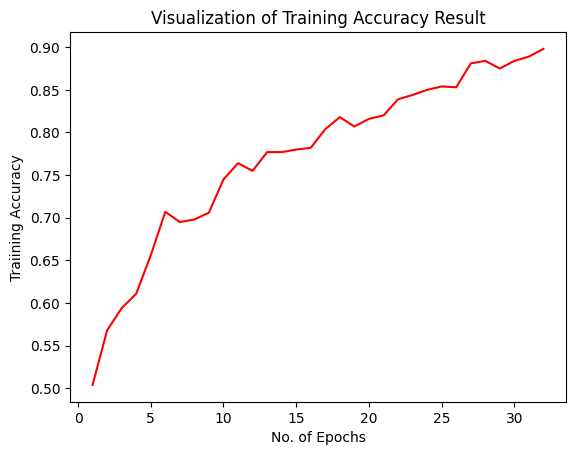

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,Trainig_Cnn.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

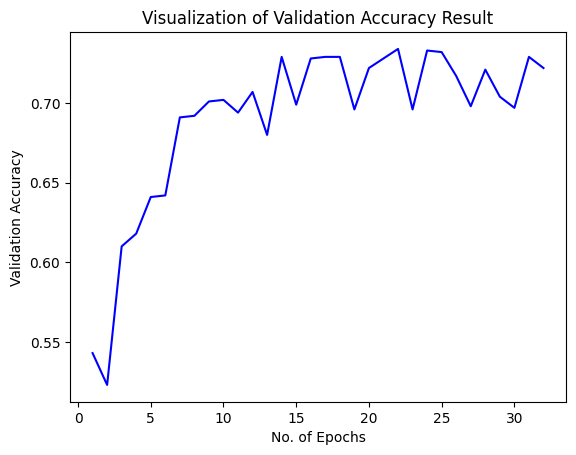

In [ ]:
plt.plot(epochs,Trainig_Cnn.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [ ]:
import os

valid_formats = ( '.jpg')
image_paths = []

for filename in os.listdir("/content/drive/MyDrive/Cnn/test_set/cats/"):
    if filename.lower().endswith(valid_formats):
        image_paths.append(os.path.join("/content/drive/MyDrive/Cnn/test_set/cats/", filename))

if not image_paths:
    raise ValueError(
        f"No images found in directory /content/drive/MyDrive/Cnn/test_set/cats/. "
        f"Allowed formats: {valid_formats}"
    )

In [ ]:
cnn = tf.keras.models.load_model('/content/training_model.h5')

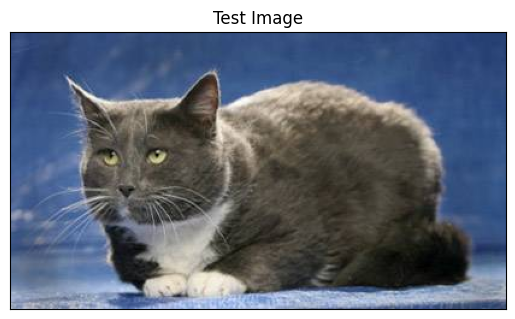

In [ ]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/Cnn/test_set/cats/cat.4197.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
import numpy as np
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 77ms/step


In [ ]:
print(predictions)

[[1.]]


In [ ]:
result_index = np.argmax(predictions)
print(result_index)

0


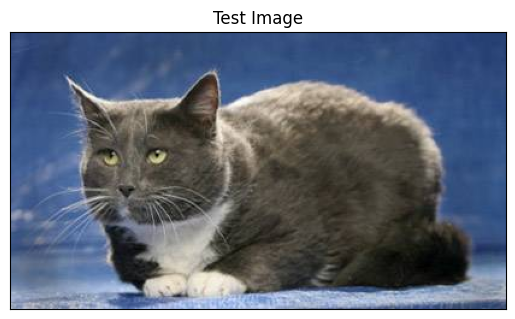

In [ ]:
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
print(type(test_set))

<class 'keras.src.preprocessing.image.DirectoryIterator'>


In [ ]:
class_names = test_set.class_indices
result_class = list(class_names.keys())[list(class_names.values()).index(result_index)]
print("It's a {}".format(result_class))

It's a cats
